In [ ]:
import pandas as pd
data = pd.read_excel('water_quality_2020corrected (1).xlsx')
print("The dataset is given below.")
data.head(5)

The dataset is given below.


,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25,30,5.0,8.0,7.4,8.4,212,440,1.2,2.7,0.15,2.05,4,15,64,240
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24,32,5.8,8.5,6.9,8.3,228,321,1.1,3.0,0.1,3.93,7,21,93,210
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24,33,6.0,8.5,7.2,8.3,274,522,1.0,2.7,0.25,1.72,7,21,75,210
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24,31,5.3,8.0,7.1,8.7,324,790,1.7,4.5,0.25,9.5,9,23,120,460


In [ ]:
data.isnull().any()

Station_code          True
Station_Name          True
State_Name            True
Temp_Min              True
Temp_Max              True
Dissolved_O2_Min      True
Dissolved_O2_Max      True
pH_Min                True
pH_Max                True
Conductivity_Min      True
Conductivity_Max      True
BOD_Min               True
BOD_Max               True
Nitrate_Min           True
Nitrate_Max           True
Fecal_Coliform_Min    True
Fecal_Coliform_Max    True
Total_Coliform_Min    True
Total_Coliform_Max    True
dtype: bool

In [ ]:
#replace BDL by 0
df1=data.replace(to_replace="BDL",value=0)

In [ ]:
df2=df1.replace(to_replace='-',value=0)

In [ ]:
df3=df2.dropna()
df3.isnull().any()

Station_code          False
Station_Name          False
State_Name            False
Temp_Min              False
Temp_Max              False
Dissolved_O2_Min      False
Dissolved_O2_Max      False
pH_Min                False
pH_Max                False
Conductivity_Min      False
Conductivity_Max      False
BOD_Min               False
BOD_Max               False
Nitrate_Min           False
Nitrate_Max           False
Fecal_Coliform_Min    False
Fecal_Coliform_Max    False
Total_Coliform_Min    False
Total_Coliform_Max    False
dtype: bool

In [ ]:
df3.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,440.0,1.2,2.7,0.15,2.05,4.0,15.0,64.0,240.0
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,321.0,1.1,3.0,0.10,3.93,7.0,21.0,93.0,210.0
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,522.0,1.0,2.7,0.25,1.72,7.0,21.0,75.0,210.0
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,790.0,1.7,4.5,0.25,9.50,9.0,23.0,120.0,460.0
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,369.0,1.2,2.6,0.07,3.65,7.0,21.0,120.0,210.0


Potability

In [ ]:
#Parameter threshold values
#Threshold values were collected from Research papers and websites
temp_min_threshold = 10.0
temp_max_threshold = 22.0
dissolved_O2_min_threshold = 6.5
dissolved_O2_max_threshold = 8.0
ph_min_threshold = 6.5
ph_max_threshold = 8.5
conductivity_min_threshold = 50
conductivity_max_threshold = 1500
bod_max_threshold = 3
nitrate_max_threshold = 45
total_coliform_max_threshold = 50

In [ ]:
# Create the Potability column based on rules
# Initialize as "Potable"
df3['Potability'] = 'Not Potable'

<ipython-input-13-199edad09cc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Potability'] = 'Not Potable'


In [ ]:
df3.loc[(df3['Temp_Min'] < temp_min_threshold) |
 (df3['Temp_Max'] < temp_max_threshold) &
 (df3['Dissolved_O2_Max'] < dissolved_O2_max_threshold) &
 (df3['pH_Min'] < ph_min_threshold) |
 (df3['pH_Max'] < ph_max_threshold) &
 (df3['Conductivity_Min'] < conductivity_min_threshold) |
 (df3['Conductivity_Max'] < conductivity_max_threshold) &
 (df3['BOD_Max'] < bod_max_threshold) &
 (df3['Nitrate_Max'] < nitrate_max_threshold) &
 (df3['Total_Coliform_Max'] < total_coliform_max_threshold), 'Potability'] = 'Potable'

In [ ]:
df3.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,440.0,1.2,2.7,0.15,2.05,4.0,15.0,64.0,240.0,Not Potable
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,321.0,1.1,3.0,0.10,3.93,7.0,21.0,93.0,210.0,Not Potable
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,522.0,1.0,2.7,0.25,1.72,7.0,21.0,75.0,210.0,Not Potable
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,790.0,1.7,4.5,0.25,9.50,9.0,23.0,120.0,460.0,Not Potable
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,369.0,1.2,2.6,0.07,3.65,7.0,21.0,120.0,210.0,Not Potable


In [ ]:
d=df3['Potability']
pd.set_option('display.max_rows', None)
d.head(15)

1     Not Potable
2     Not Potable
3     Not Potable
4     Not Potable
5     Not Potable
6     Not Potable
7     Not Potable
8         Potable
9     Not Potable
10    Not Potable
11    Not Potable
12    Not Potable
13    Not Potable
14    Not Potable
15    Not Potable
Name: Potability, dtype: object

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['potab_label'] = le.fit_transform(df3['Potability'])

<ipython-input-17-12112a095bfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['potab_label'] = le.fit_transform(df3['Potability'])


In [ ]:
df3.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,...,1.2,2.7,0.15,2.05,4.0,15.0,64.0,240.0,Not Potable,0
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,...,1.1,3.0,0.10,3.93,7.0,21.0,93.0,210.0,Not Potable,0
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,...,1.0,2.7,0.25,1.72,7.0,21.0,75.0,210.0,Not Potable,0
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,...,1.7,4.5,0.25,9.50,9.0,23.0,120.0,460.0,Not Potable,0
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,...,1.2,2.6,0.07,3.65,7.0,21.0,120.0,210.0,Not Potable,0


TIME SERIES

<Axes: title={'center': ' Water Potability Distribution'}, ylabel='potab_label'>

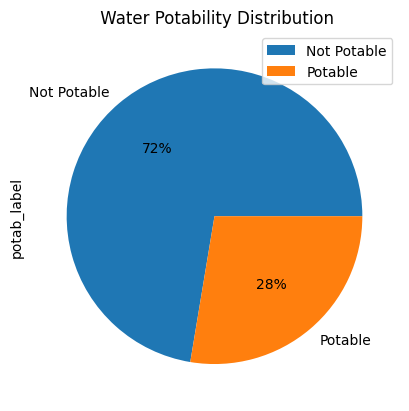

In [ ]:
#1
import matplotlib.pyplot as plt
df3.groupby(['Potability']).count().plot(kind='pie', y='potab_label',autopct='%1.0f%%',title=" Water Potability Distribution")

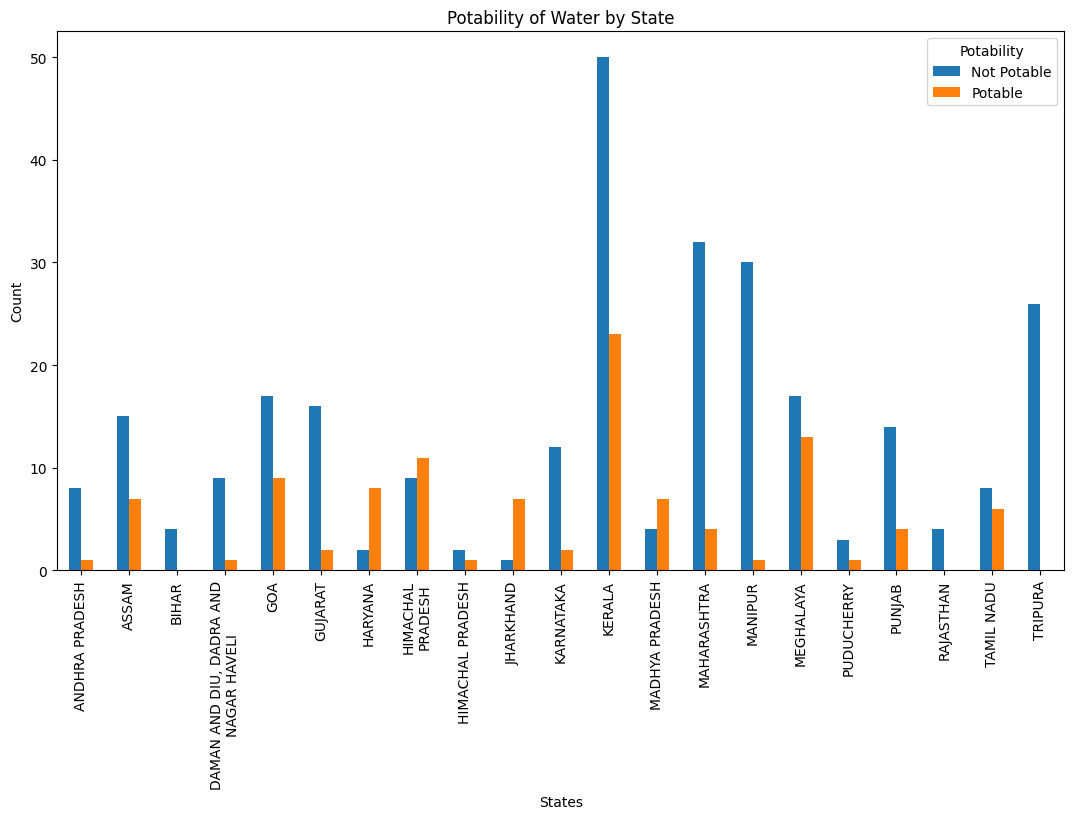

In [ ]:
#2
import matplotlib.pyplot as plt
grouped_data = df3.groupby(['State_Name', 'Potability']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=False,figsize=(13,7))
ax.set_xlabel('States')
ax.set_ylabel('Count')
ax.set_title('Potability of Water by State')
plt.show()

Decision Tree

In [ ]:
X = df3.drop(["Station_code","Station_Name","State_Name","Potability","potab_label"], axis ='columns')
y = df3[['potab_label']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)
from sklearn import tree
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train)
X_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9576271186440678


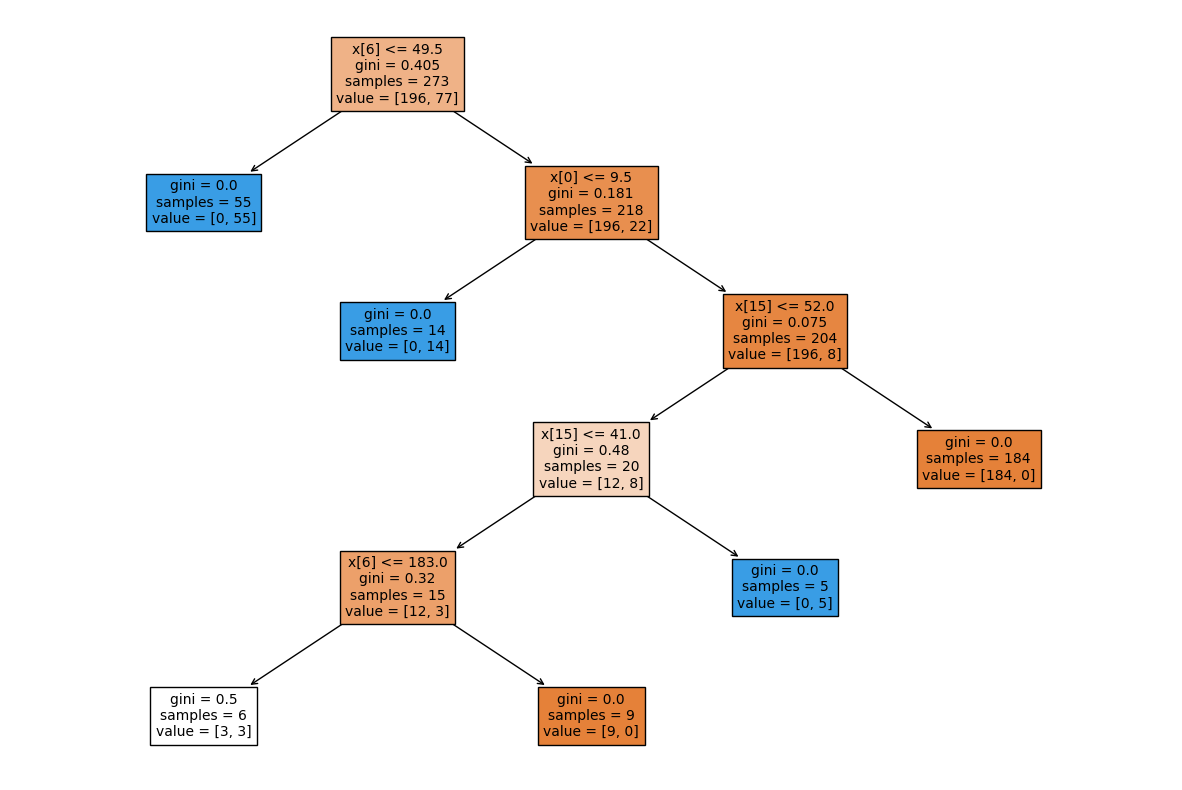

In [ ]:
#visualise tree
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(15,10))
tree.plot_tree(model,fontsize=10,filled=True,impurity=True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
X_pred=model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.7288135593220338


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9661016949152542


SVM ALGORITHM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm=SVC(C= 100)
svm.fit(X_train,y_train)
print("Accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUITABILITY

In [ ]:
df4 = df3
df4.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,...,1.2,2.7,0.15,2.05,4.0,15.0,64.0,240.0,Not Potable,0
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,...,1.1,3.0,0.10,3.93,7.0,21.0,93.0,210.0,Not Potable,0
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,...,1.0,2.7,0.25,1.72,7.0,21.0,75.0,210.0,Not Potable,0
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,...,1.7,4.5,0.25,9.50,9.0,23.0,120.0,460.0,Not Potable,0
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,...,1.2,2.6,0.07,3.65,7.0,21.0,120.0,210.0,Not Potable,0


In [ ]:
#Parameter threshold values
#Threshold values were collected from Research papers and websites
temp_min_threshold = 20.0
temp_max_threshold = 30.0
dissolved_O2_min_threshold = 5.0
dissolved_O2_max_threshold = 8.0
ph_min_threshold = 6.5
ph_max_threshold = 7.0
conductivity_min_threshold = 500
conductivity_max_threshold = 1500
bod_min_threshold = 2
bod_max_threshold = 5
nitrate_max_threshold = 5
fecal_coliform_min_threshold = 10
fecal_coliform_max_threshold = 1500
total_coliform_min_threshold = 100
total_coliform_max_threshold = 10000

In [ ]:
# Create the SUITABILITY column based on rules
# Initialize as "Not Clean"
df4['Suitability'] = 'Not Clean'

<ipython-input-29-3a2a1c74f0a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Suitability'] = 'Not Clean'


In [ ]:
df4.loc[(df4['Temp_Min'] < temp_min_threshold) |
 (df4['Temp_Max'] < temp_max_threshold) &
 (df4['Dissolved_O2_Max'] < dissolved_O2_max_threshold) &
 (df4['pH_Min'] < ph_min_threshold) |
 (df4['pH_Max'] < ph_max_threshold) &
 (df4['Conductivity_Min'] < conductivity_min_threshold) |
 (df4['Conductivity_Max'] < conductivity_max_threshold) &
 (df4['BOD_Min'] < bod_min_threshold) |
 (df4['BOD_Max'] < bod_max_threshold) &
 (df4['Nitrate_Max'] > nitrate_max_threshold) &
 (df4['Fecal_Coliform_Max'] < fecal_coliform_max_threshold) &
 (df4['Total_Coliform_Min'] < total_coliform_min_threshold) |
 (df4['Total_Coliform_Max'] < total_coliform_max_threshold), 'Suitability'] = 'Clean'

In [ ]:
df4.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label,Suitability
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,...,2.7,0.15,2.05,4.0,15.0,64.0,240.0,Not Potable,0,Clean
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,...,3.0,0.10,3.93,7.0,21.0,93.0,210.0,Not Potable,0,Clean
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,...,2.7,0.25,1.72,7.0,21.0,75.0,210.0,Not Potable,0,Clean
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,...,4.5,0.25,9.50,9.0,23.0,120.0,460.0,Not Potable,0,Clean
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,...,2.6,0.07,3.65,7.0,21.0,120.0,210.0,Not Potable,0,Clean


In [ ]:
d1=df4['Suitability']
pd.set_option('display.max_rows', None)
d1.head(15)

1     Clean
2     Clean
3     Clean
4     Clean
5     Clean
6     Clean
7     Clean
8     Clean
9     Clean
10    Clean
11    Clean
12    Clean
13    Clean
14    Clean
15    Clean
Name: Suitability, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['suit_label'] = le.fit_transform(df4['Suitability'])

<ipython-input-33-e92952cfe1ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['suit_label'] = le.fit_transform(df4['Suitability'])


In [ ]:
df4.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2_Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label,Suitability,suit_label
1,1448,"RIVER NAGAVALI AT THOTAPALLI\nREGULATOR, VIZIA...",ANDHRA PRADESH,25.0,30.0,5.0,8.0,7.4,8.4,212.0,...,0.15,2.05,4.0,15.0,64.0,240.0,Not Potable,0,Clean,0
2,2352,"RIVER VAMSADHARA, KALINGAPATNAM,\nVIZIANAGARAM",ANDHRA PRADESH,24.0,32.0,5.8,8.5,6.9,8.3,228.0,...,0.10,3.93,7.0,21.0,93.0,210.0,Not Potable,0,Clean,0
3,4346,"RIVER NAGAVALI NEAR NH- 16 BRIDGE, UPSTREAM (U...",ANDHRA PRADESH,24.0,33.0,6.0,8.5,7.2,8.3,274.0,...,0.25,1.72,7.0,21.0,75.0,210.0,Not Potable,0,Clean,0
4,4347,RIVER NAGAVALI NEAR WATER PUMP HOUSE (KILLIPAL...,ANDHRA PRADESH,24.0,31.0,5.3,8.0,7.1,8.7,324.0,...,0.25,9.50,9.0,23.0,120.0,460.0,Not Potable,0,Clean,0
5,4348,"RIVER VAMSADHARA, IMMEDIATE BORDER BETWEEN AND...",ANDHRA PRADESH,22.0,33.0,6.0,8.2,6.9,8.2,248.0,...,0.07,3.65,7.0,21.0,120.0,210.0,Not Potable,0,Clean,0


TIME SERIES

<Axes: title={'center': 'Water Suitability Distribution'}, ylabel='suit_label'>

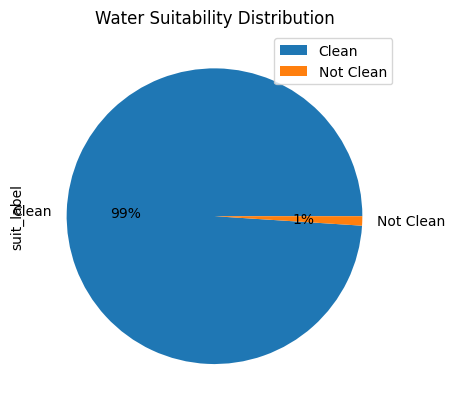

In [ ]:
#1
import matplotlib.pyplot as plt
df4.groupby(['Suitability']).count().plot(kind='pie', y='suit_label',autopct='%1.0f%%',title="Water Suitability Distribution")

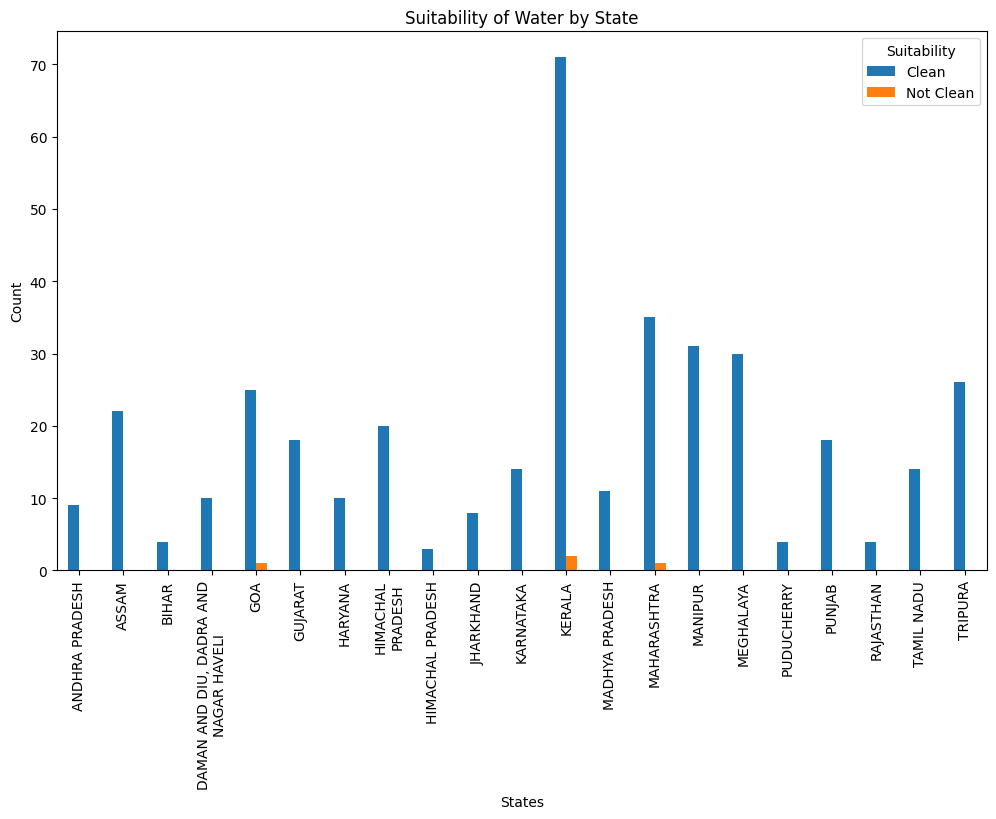

In [ ]:
#2
import matplotlib.pyplot as plt
grouped_data = df4.groupby(['State_Name', 'Suitability']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=False,figsize=(12,7))
ax.set_xlabel('States')
ax.set_ylabel('Count')
ax.set_title('Suitability of Water by State')
plt.show()

In [ ]:
#3
filtered_potable = df4[(df4['Potability'] == 'Potable')]
filtered_clean = df4[(df4['Suitability'] == 'Clean')]

summary_potable = filtered_potable['State_Name'].value_counts().reset_index()
summary_potable.columns = ['State', 'Potable Count']

summary_clean = filtered_clean['State_Name'].value_counts().reset_index()
summary_clean.columns = ['State', 'Clean Count']

summary_table = pd.merge(summary_potable, summary_clean, on='State', how='outer').fillna(0)
display('COUNT OF POTABLE AND CLEAN WATER IN EACH STATE')
print(summary_table)

'COUNT OF POTABLE AND CLEAN WATER IN EACH STATE'

                                     State  Potable Count  Clean Count
0                                   KERALA           23.0           71
1                                MEGHALAYA           13.0           30
2                        HIMACHAL\nPRADESH           11.0           20
3                                      GOA            9.0           25
4                                  HARYANA            8.0           10
5                           MADHYA PRADESH            7.0           11
6                                JHARKHAND            7.0            8
7                                    ASSAM            7.0           22
8                               TAMIL NADU            6.0           14
9                                   PUNJAB            4.0           18
10                             MAHARASHTRA            4.0           35
11                               KARNATAKA            2.0           14
12                                 GUJARAT            2.0           18
13    

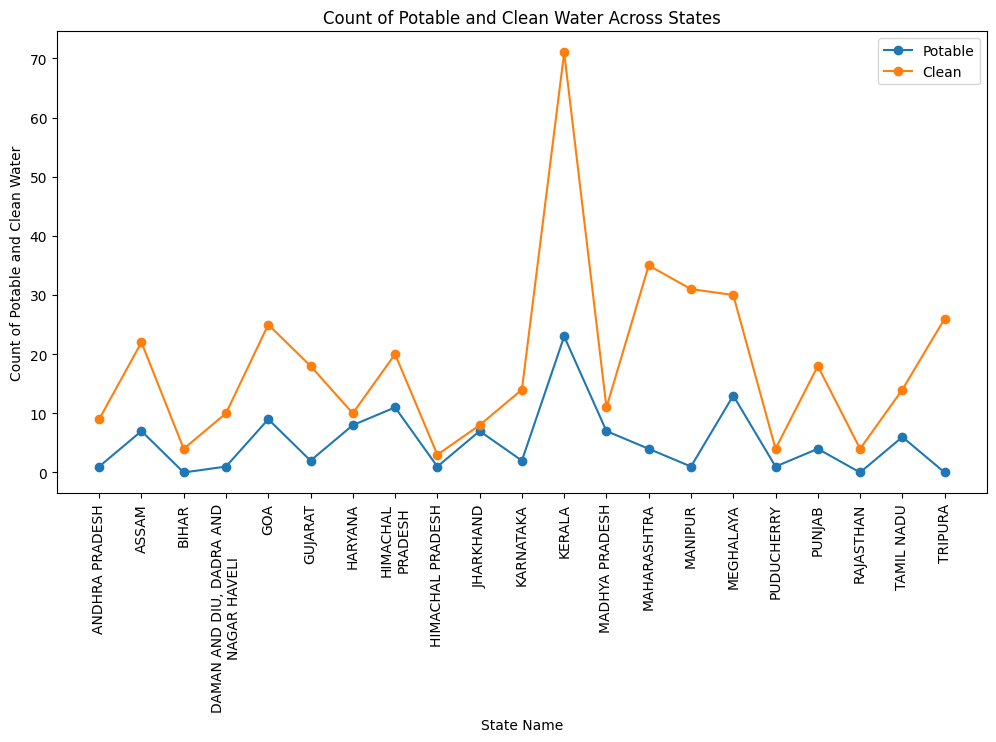

In [ ]:
#4
count_data = df4.groupby('State_Name').agg(
    count_Potable=('Potability', lambda x: (x == 'Potable').sum()),
    count_Clean=('Suitability', lambda x: (x == 'Clean').sum())).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(count_data['State_Name'], count_data['count_Potable'], marker='o', linestyle='-', label='Potable')
plt.plot(count_data['State_Name'], count_data['count_Clean'], marker='o', linestyle='-', label='Clean')

plt.xlabel('State Name')
plt.ylabel('Count of Potable and Clean Water')
plt.title('Count of Potable and Clean Water Across States')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Decision Tree

In [ ]:
X = df4.drop(["Station_code","Station_Name","State_Name","Suitability","suit_label","Potability","potab_label"], axis ='columns')
y = df4[['suit_label']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train)
X_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9915254237288136


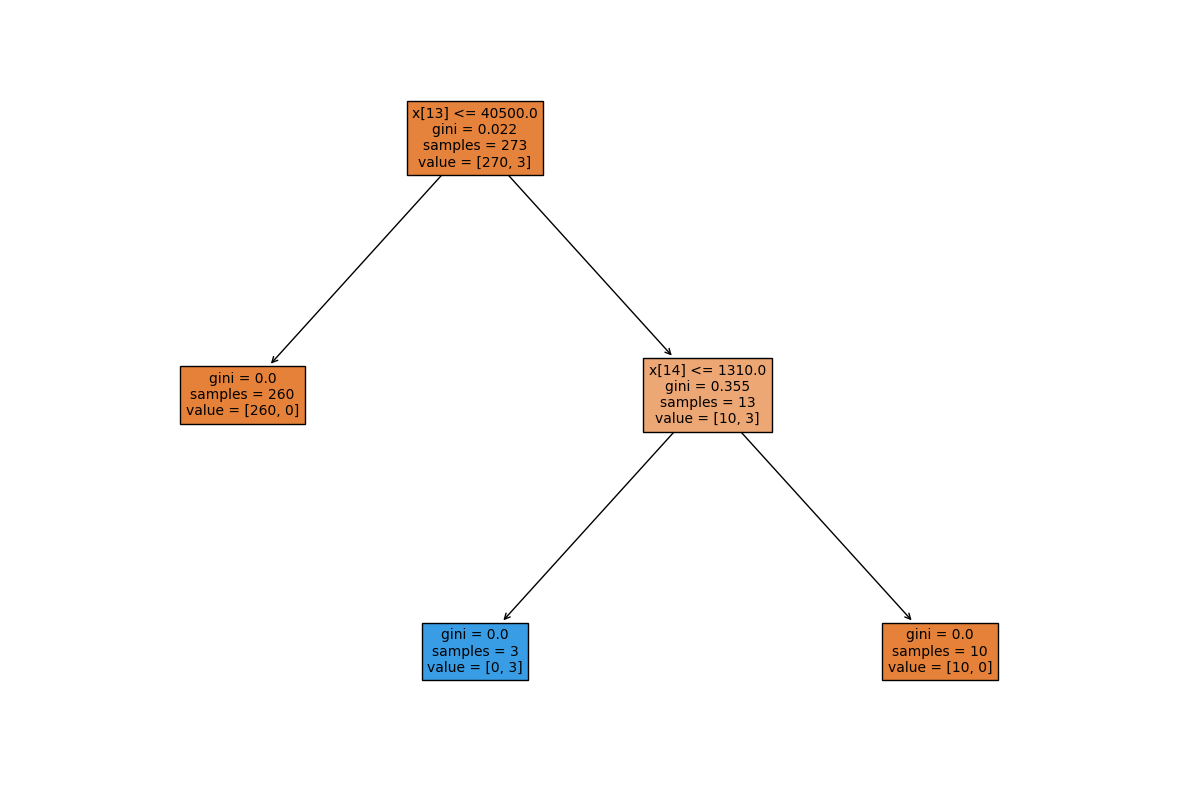

In [ ]:
#visualize tree
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(15,10))
tree.plot_tree(model,fontsize=10,filled=True,impurity=True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
X_pred=model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9915254237288136


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9915254237288136


SVM Algorithmn

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm=SVC(C= 100)
svm.fit(X_train,y_train)
print("Accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
